In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
single_precision_file = h5py.File('../../hw2d/test_single.h5', 'r')
double_precision_file = h5py.File('../../hw2d/test_double.h5', 'r')


In [4]:
# Compute the l2 norm of the difference between single and double precision results

density_l2_norm = np.linalg.norm(single_precision_file['density'][:] - double_precision_file['density'][:], axis=(1,2))
density_l2_norm.shape

(12001,)

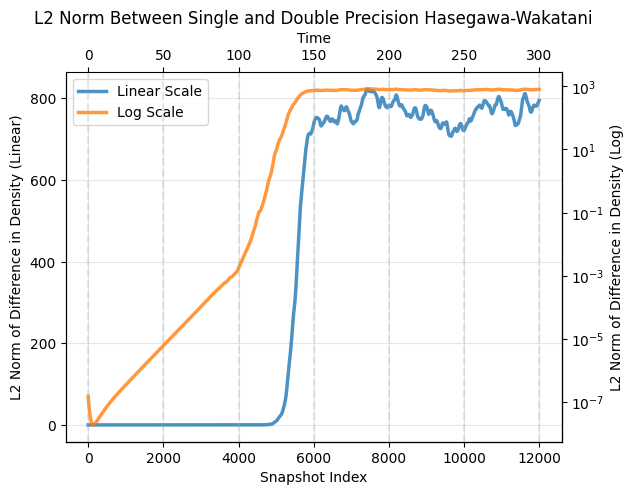

In [5]:
fig, ax = plt.subplots()

actual_time = np.arange(len(density_l2_norm)) * 0.025

# Plot on primary (left) axis - linear scale
line1 = ax.plot(density_l2_norm, lw=2.5, color='tab:blue', alpha=0.8, label='Linear Scale')
ax.set_ylabel('L2 Norm of Difference in Density (Linear)')
ax.set_xlabel('Snapshot Index')
ax.set_title('L2 Norm Between Single and Double Precision Hasegawa-Wakatani')
ax.grid(alpha=0.3)

# Create secondary (right) axis - log scale
ax2 = ax.twinx()
line2 = ax2.plot(density_l2_norm, lw=2.5, color='tab:orange', alpha=0.8, label='Log Scale')
ax2.set_yscale('log')
ax2.set_ylabel('L2 Norm of Difference in Density (Log)')

# Create the third x-axis on top
ax3 = ax.twiny()
ax3.plot(actual_time, density_l2_norm, alpha=0)  # Invisible plot to set the scale
ax3.set_xlabel('Time')
ax3.xaxis.set_label_position('top')
ax3.xaxis.tick_top()
ax3.grid(alpha=0.3, linestyle='--', lw=1.5)

# Remove top spine for both axes
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Optional: Remove left spine as in original
ax.spines['left'].set_visible(False)

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='upper left')

# Save figure
fig.savefig('single_vs_double_density.png', dpi=300, bbox_inches='tight')

### DMD Experiments

In [6]:
single_precision_file['density'][:].shape

(12001, 256, 256)

/home/anthonypoole/repos/PyDMD/pydmd/snapshots.py:73: UserWarning: Input data condition number 7708728832.0. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


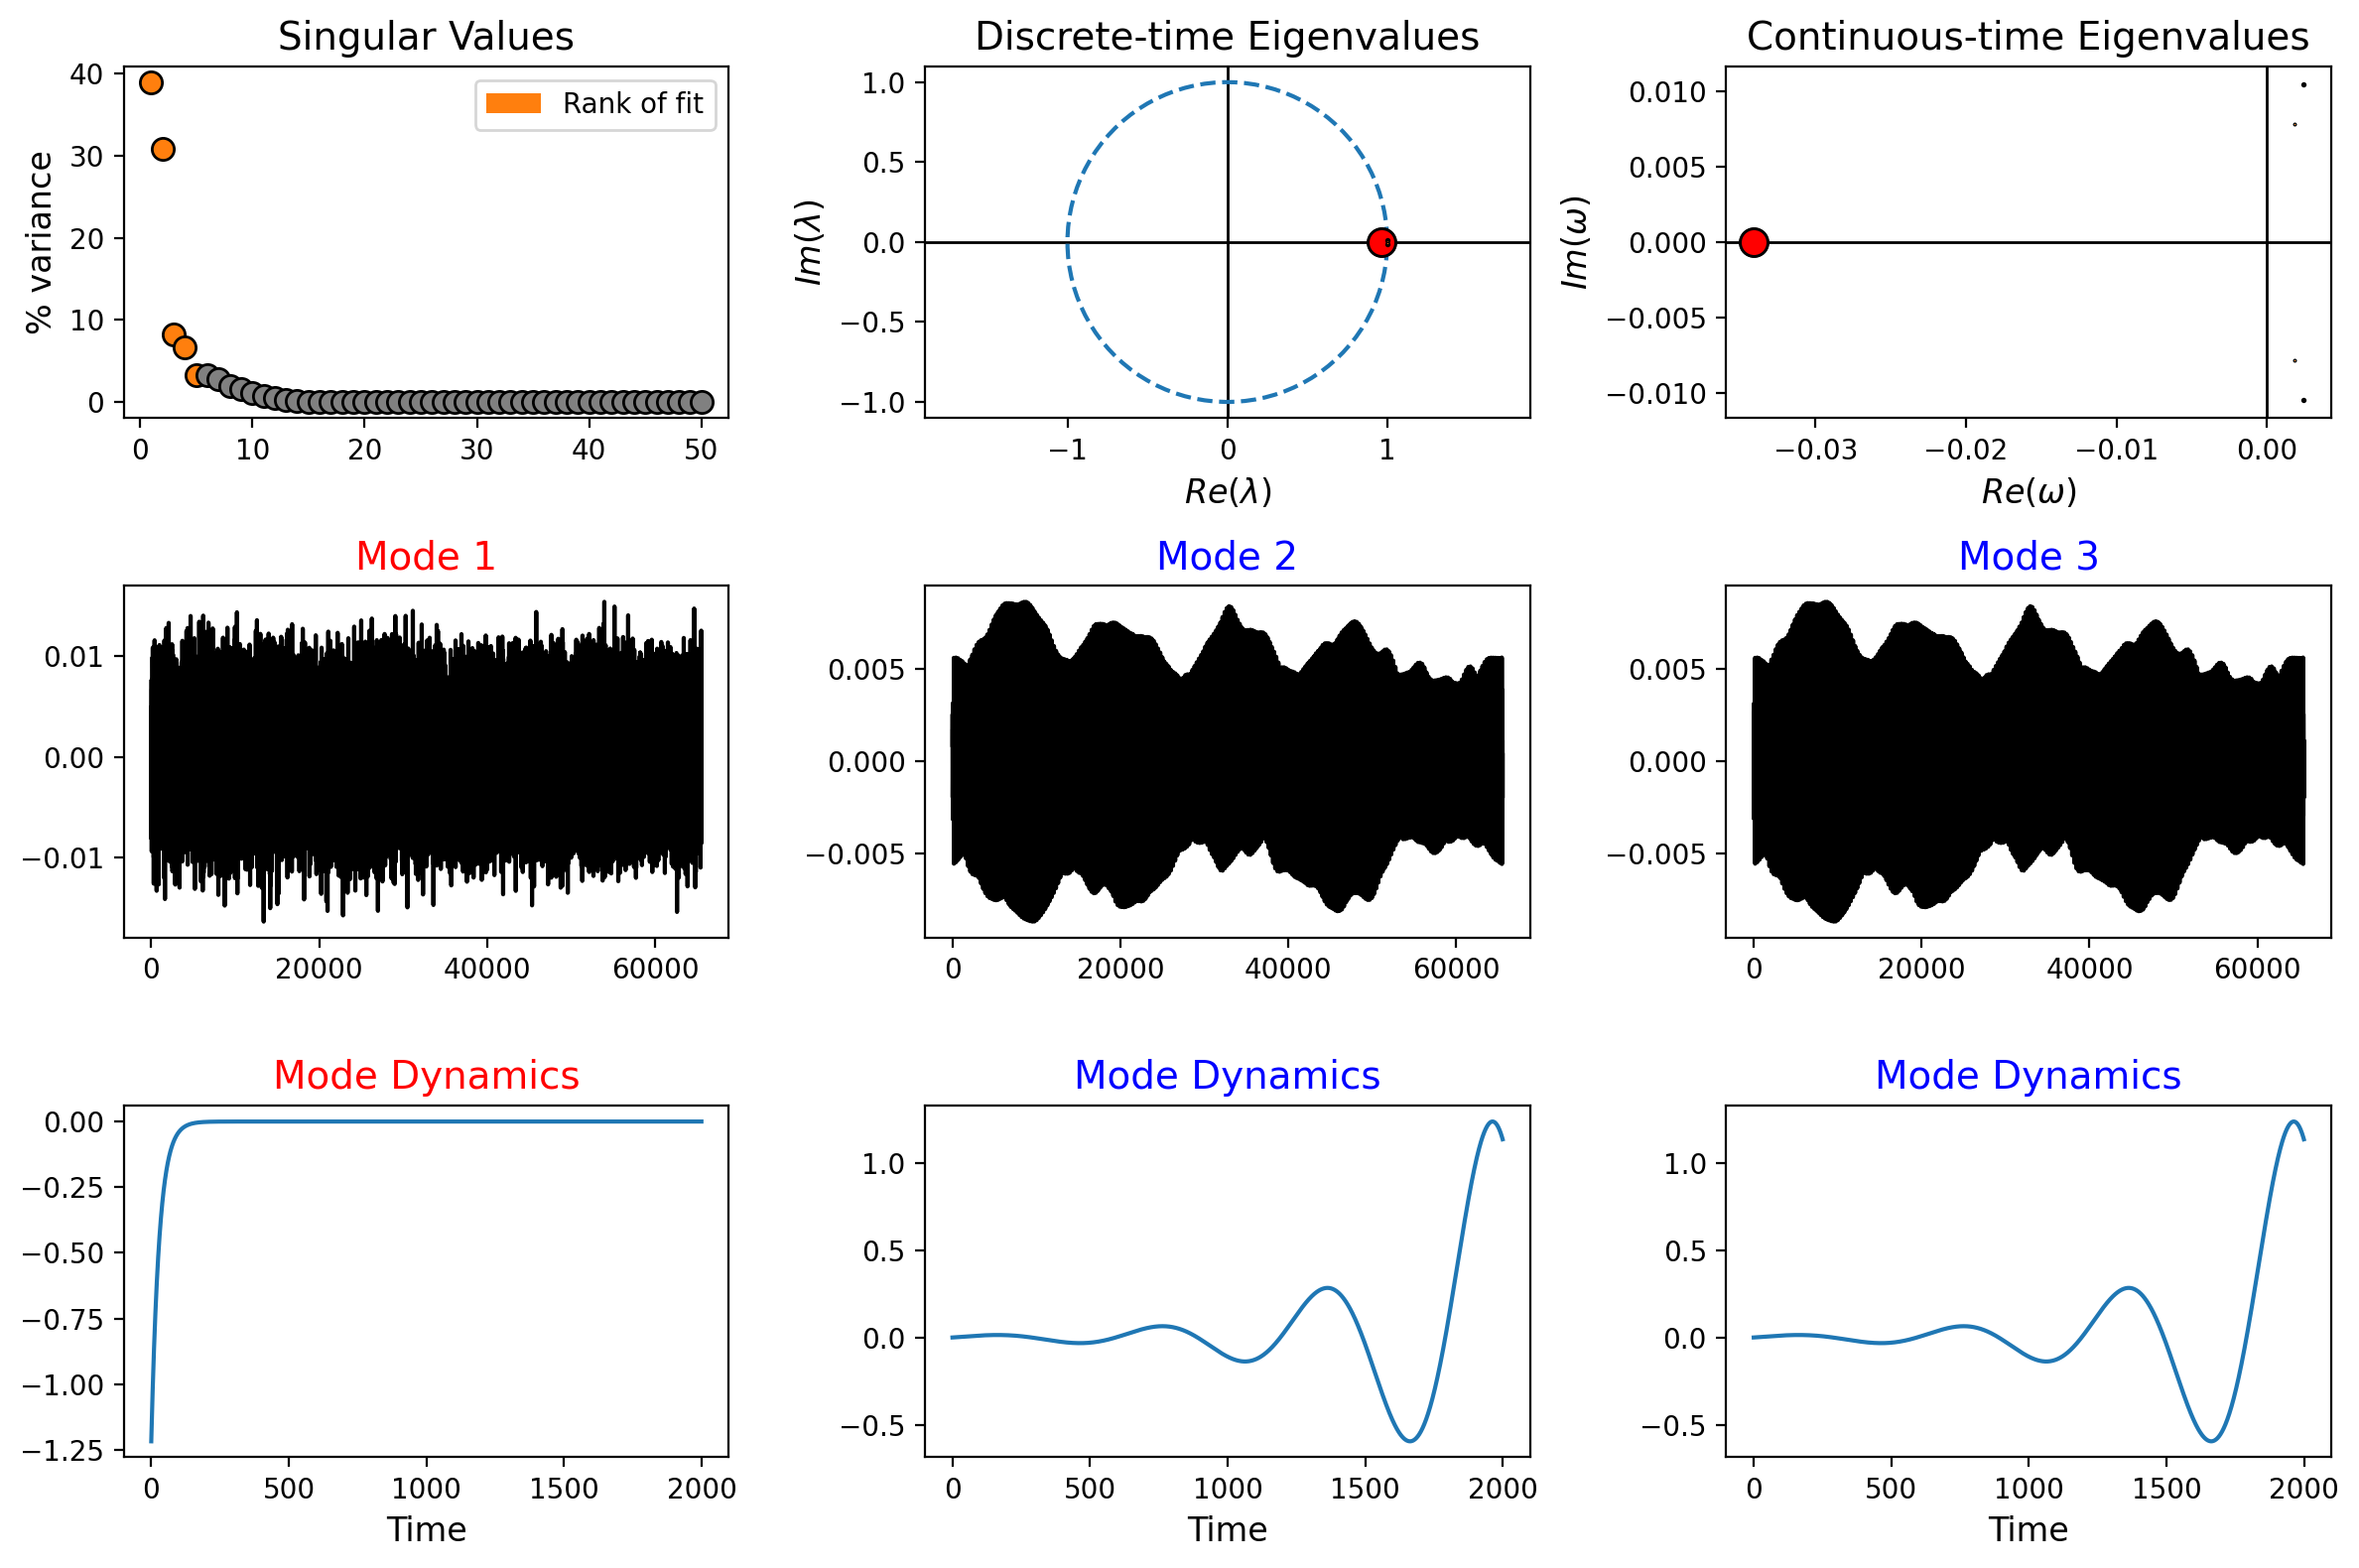

In [10]:
from pydmd import DMD
from pydmd.plotter import plot_summary

training_snapshots = np.array(single_precision_file['density']).T[..., :2000]
training_time_domain = np.arange(2000) * 0.025

dmd = DMD(svd_rank=5)

dmd.fit(training_snapshots)

plot_summary(dmd)

del training_snapshots
del training_time_domain